Метод описан в разделе диплома "Теоретическое описание метода наименьших квадратов". На выходе алгоритм выводит значения параметров a2, a1, a0.

Данное решение пока не интегрировано в алгорит статистического арбитража (к середине января планирую это сделать, а также реализовать для его для определения порогового спреда)

In [1]:
!git clone https://github.com/Churilinavalentina/diplom.git -b test_case

Cloning into 'diplom'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [3]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np


In [4]:
a = []
b = []

with open('/content/diplom/SBER_200101_211201_1hour.csv', newline='') as File:
    reader = csv.reader(File, delimiter = ";")
    for row in reader:
        a.append(row)
with open('/content/diplom/SBERP_200101_211201_1_hour.csv', newline='') as File:
    reader = csv.reader(File, delimiter = ",")
    for row in reader:
        b.append(row)

from re import L
first_share = []
second_share = []
Axis = []

# Коэффициент нормировки
k = []

Summ_first_share = 0
Summ_second_share = 0
Summ_k = 0

# Преобразуем датасеты в списки
for i in range(len(b)-1):
    first_share.append(float(a[i+1][4]))
    second_share.append(float(b[i+1][4]))
    k.append(second_share[i]/first_share[i])
    Summ_first_share = Summ_first_share+first_share[i]
    Summ_second_share = Summ_second_share+second_share[i]
    Axis.append(a[i+1][2])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


8.545073296631269e-05
0.8659603882008857
9.78657604272425


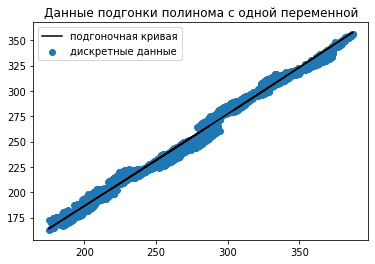

In [5]:
import matplotlib.pyplot as plt
from pylab import mpl
import math

 #"" "Аппроксимация полиномиальной кривой с одной переменной
 #    Соответствующие данные: xi = 0, 1, 2, 3, 4, 5.
 # Соответствующее значение функции yi = 2.1, 7.7, 13.6, 27.2, 40.9, 61

x = first_share
y = second_share

 #"" "Завершите расчет соответствующих переменных перед расчетом параметров подобранной кривой" ""
def polynomial_fitting(data_x,data_y):
    size=len(data_x)
    i=0
    sum_x = 0
    sum_sqare_x =0
    sum_third_power_x = 0
    sum_four_power_x = 0
    average_x = 0
    average_y = 0
    sum_y = 0
    sum_xy = 0
    sum_sqare_xy = 0
    while i<size:
        sum_x += data_x[i]
        sum_y += data_y[i]
        sum_sqare_x += math.pow(data_x[i],2)
        sum_third_power_x +=math.pow(data_x[i],3)
        sum_four_power_x +=math.pow(data_x[i],4)
        sum_xy +=data_x[i]*data_y[i]
        sum_sqare_xy +=math.pow(data_x[i],2)*data_y[i]
        i += 1;
    average_x=sum_x/size
    average_y=sum_y/size
    return [[size, sum_x, sum_sqare_x, sum_y]
        , [sum_x, sum_sqare_x, sum_third_power_x, sum_xy]
        , [sum_sqare_x,sum_third_power_x,sum_four_power_x,sum_sqare_xy]]
 
 
# "" "Завершите расчет параметров аппроксимирующей кривой
#   При решении уравнения используйте метод исключения Гаусса для вычисления соответствующего значения параметра

def calculate_parameter(data):
         #i используется для управления элементами столбца, line - это элемент строки, j используется для управления количеством циклов, а данные используются для хранения локальных переменных. Сохраните измененное значение
    i = 0;
    j = 0;
    line_size = len(data)
 
       # Преобразовать определитель в определитель верхнего треугольника
    while j < line_size-1:
        line = data[j]
        temp = line[j]
        templete=[]
        for x in line:
            x=x/temp
            templete.append(x)
        data[j]=templete
                 #flag обозначает количество строк, которые следует удалить
        flag = j+1
        while flag < line_size:
            templete1 = []
            temp1=data[flag][j]
            i = 0
            for x1 in data[flag]:
                if x1!=0:
                   x1 = x1-(temp1*templete[i])
                   templete1.append(x1)
                else:
                   templete1.append(0)
                i += 1
            data[flag] = templete1
            flag +=1
        j += 1
 
 
         # Поиск соответствующего значения параметра
 
    parameters=[]
    i=line_size-1
         #j Идентификация минус количество элементов
         #flag_rolУкажите, какой столбец кроме
    flag_j=0
    rol_size=len(data[0])
    flag_rol=rol_size-2
         # Получить количество решений
    while i>=0:
        operate_line = data[i]
        if i==line_size-1:
            parameter=operate_line[rol_size-1]/operate_line[flag_rol]
            parameters.append(parameter)
        else:
            flag_j=(rol_size-flag_rol-2)
            temp2=operate_line[rol_size-1]
                         #result_flag - это флаг для доступа к решению, которое было решено.
            result_flag=0
            while flag_j>0:
                temp2-=operate_line[flag_rol+flag_j]*parameters[result_flag]
                result_flag+=1
                flag_j-=1
            parameter=temp2/operate_line[flag_rol]
            parameters.append(parameter)
        flag_rol-=1
        i-=1
    return parameters
 
 #"" "Вычислить значение подобранной кривой" ""
def calculate(data_x,parameters):
    datay=[]
    for x in data_x:
        datay.append(parameters[2]+parameters[1]*x+parameters[0]*x*x)
    return datay
 
 
 
# "Полный функциональный чертеж" ""
def draw(data_x,data_y_new,data_y_old):
         plt.plot (data_x, data_y_new, label = "подгоночная кривая", color = "black")
         plt.scatter (data_x, data_y_old, label = "дискретные данные")
         mpl.rcParams['font.sans-serif'] = ['SimHei']
         mpl.rcParams['axes.unicode_minus'] = False
         plt.title ("Данные подгонки полинома с одной переменной")
         plt.legend(loc="upper left")
         plt.show()
 
data=polynomial_fitting(x,y)
parameters=calculate_parameter(data)
for w in parameters:
    print(w)
newData=calculate(x,parameters)
draw(x,newData,y)
    